In [177]:
import pandas as pd

df = pd.read_csv("stunting.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 790 entries, 0 to 789
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   conversation_id_str      790 non-null    float64
 1   created_at               790 non-null    object 
 2   favorite_count           790 non-null    int64  
 3   full_text                790 non-null    object 
 4   id_str                   790 non-null    float64
 5   image_url                214 non-null    object 
 6   in_reply_to_screen_name  389 non-null    object 
 7   lang                     790 non-null    object 
 8   location                 0 non-null      float64
 9   quote_count              790 non-null    int64  
 10  reply_count              790 non-null    int64  
 11  retweet_count            790 non-null    int64  
 12  tweet_url                790 non-null    object 
 13  user_id_str              790 non-null    float64
 14  username                 0

In [178]:
df.head()

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1.942410e+18,Tue Jul 08 11:39:47 +0000 2025,0,@halonpc Dewasa tp kitnya stunting,1.942550e+18,NaN,halonpc,in,NaN,0,0,0,https://x.com/undefined/status/194254916817584...,1.581190e+18,NaN
1,1.942550e+18,Tue Jul 08 11:23:28 +0000 2025,145,Bayangin 240 T buat biayain BPJS kesehatan kit...,1.942550e+18,NaN,NaN,in,NaN,3,3,122,https://x.com/undefined/status/194254506267370...,2.129530e+08,NaN
2,1.942540e+18,Tue Jul 08 10:57:34 +0000 2025,0,Wakil Bupati Luwu Tegaskan Pentingnya Kolabora...,1.942540e+18,NaN,NaN,in,NaN,0,0,0,https://x.com/undefined/status/194253854454493...,1.737370e+18,NaN
3,1.942540e+18,Tue Jul 08 10:52:55 +0000 2025,0,Pemprov Banten bareng BNI dan BKKBN gaspol tek...,1.942540e+18,https://pbs.twimg.com/media/GvVHczVXMAIcXQF.jpg,NaN,in,NaN,0,0,0,https://x.com/undefined/status/194253737718201...,2.911375e+09,NaN
4,1.942540e+18,Tue Jul 08 10:52:32 +0000 2025,0,Dari Desa Aur Cino Babinsa Koramil Pulau Temia...,1.942540e+18,https://pbs.twimg.com/media/GvVHW91aYAUH0AS.jpg,NaN,in,NaN,0,0,0,https://x.com/undefined/status/194253727789025...,1.601820e+18,NaN


In [179]:
data_tweet = pd.DataFrame(data=df['full_text'])
data_tweet.head()

,full_text
0,@halonpc Dewasa tp kitnya stunting
1,Bayangin 240 T buat biayain BPJS kesehatan kit...
2,Wakil Bupati Luwu Tegaskan Pentingnya Kolabora...
3,Pemprov Banten bareng BNI dan BKKBN gaspol tek...
4,Dari Desa Aur Cino Babinsa Koramil Pulau Temia...


In [180]:
data_tweet.shape

(790, 1)

# Text Preprocessing

In [181]:
import re

## Case Folding

In [182]:
def case_folding(tweet) :
    if tweet is not None and isinstance(tweet, str):
        tweet = tweet.lower()
        return tweet
    else:
        return tweet

## Remove unnecessary

In [183]:
def remove_URL(tweet):
    if tweet is not None and isinstance(tweet, str):
        url = re.compile(r'https?://\S+|www\.\S+')
        return url.sub(r'', tweet)
    else:
        return tweet

In [184]:
def remove_html(tweet):
    if tweet is not None and isinstance(tweet, str):
        html = re.compile(r'<.*?>')
        return html.sub(r'', tweet)
    else:
        return tweet

In [185]:
def remove_emoji(tweet):
    if tweet is not None and isinstance(tweet, str):
        emoji_pattern = re.compile("["
            u"\U0001F600-\U0001F64F"  # emoticons
            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
            u"\U0001F680-\U0001F6FF"  # transport & map symbols
            u"\U0001F700-\U0001F77F"  # alchemical symbols
            u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
            u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
            u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
            u"\U0001FA00-\U0001FA6F"  # Chess Symbols
            u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
            u"\U0001F004-\U0001F0CF"  # Additional emoticons
            u"\U0001F1E0-\U0001F1FF"  # flags
                               "]+", flags=re.UNICODE)
        return emoji_pattern.sub(r'', tweet)
    else:
        return tweet

In [186]:
def remove_symbols(tweet):
    if tweet is not None and isinstance(tweet, str):
        tweet = re.sub(r'[^a-zA-Z0-9\s]', '', tweet)
    return tweet

In [187]:
def remove_numbers(tweet):
    if tweet is not None and isinstance(tweet, str):
        tweet = re.sub(r'\d', '', tweet)
    return tweet

In [188]:
def remove_usernames(tweet):
    return re.sub(r'@\w+', '', tweet)

## Preprocessing Pipeline

In [189]:
def preprocessing_pipeline(tweet) :
    tweet = case_folding(tweet)
    tweet = remove_URL(tweet)
    tweet = remove_html(tweet)
    tweet = remove_emoji(tweet)
    tweet = remove_symbols(tweet)
    tweet = remove_numbers(tweet)
    tweet = remove_usernames(tweet)
    return tweet


In [190]:
data_tweet['cleaning'] = data_tweet['full_text'].apply(lambda x: preprocessing_pipeline(x))

In [191]:
data_tweet

,full_text,cleaning
0,@halonpc Dewasa tp kitnya stunting,halonpc dewasa tp kitnya stunting
1,Bayangin 240 T buat biayain BPJS kesehatan kit...,bayangin t buat biayain bpjs kesehatan kita g...
2,Wakil Bupati Luwu Tegaskan Pentingnya Kolabora...,wakil bupati luwu tegaskan pentingnya kolabora...
3,Pemprov Banten bareng BNI dan BKKBN gaspol tek...,pemprov banten bareng bni dan bkkbn gaspol tek...
4,Dari Desa Aur Cino Babinsa Koramil Pulau Temia...,dari desa aur cino babinsa koramil pulau temia...
...,...,...
785,@Stsweetyt @816hio @seblak_pt1 @labilgajelas @...,stsweetyt hio seblakpt labilgajelas nafshx kal...
786,@asyrafilkhalqi anti kritik yg mengatas namaka...,asyrafilkhalqi anti kritik yg mengatas namakan...
787,aneh bgt masih ada yg ngebela. terlepas dari s...,aneh bgt masih ada yg ngebela terlepas dari si...
788,Opini yang ga seharusnya. Hal yg gue ga setuju...,opini yang ga seharusnya hal yg gue ga setuju ...


## Text Normalize

In [192]:
# Fungsi penggantian kata tidak baku
def replace_taboo_words(text, kamus_tidak_baku):
    if isinstance(text, str):
        words = text.split()
        replaced_words = []
        kalimat_baku = []
        kata_diganti = []
        kata_tidak_baku_hash = []

        for word in words:
            if word in kamus_tidak_baku:
                baku_word = kamus_tidak_baku[word]
                if isinstance(baku_word, str) and all(char.isalpha() for char in baku_word):
                    replaced_words.append(baku_word)
                    kalimat_baku.append(baku_word)
                    kata_diganti.append(word)
                    kata_tidak_baku_hash.append(hash(word))
            else:
                replaced_words.append(word)
        replaced_text = ' '.join(replaced_words)
    else:
        replaced_text = ''
        kalimat_baku = []
        kata_diganti = []
        kata_tidak_baku_hash = []

    return replaced_text, kalimat_baku, kata_diganti, kata_tidak_baku_hash

# Baca dataset kamu (pastikan df sudah tersedia)
data = pd.DataFrame(data_tweet[['full_text','cleaning']])
data.head()

,full_text,cleaning
0,@halonpc Dewasa tp kitnya stunting,halonpc dewasa tp kitnya stunting
1,Bayangin 240 T buat biayain BPJS kesehatan kit...,bayangin t buat biayain bpjs kesehatan kita g...
2,Wakil Bupati Luwu Tegaskan Pentingnya Kolabora...,wakil bupati luwu tegaskan pentingnya kolabora...
3,Pemprov Banten bareng BNI dan BKKBN gaspol tek...,pemprov banten bareng bni dan bkkbn gaspol tek...
4,Dari Desa Aur Cino Babinsa Koramil Pulau Temia...,dari desa aur cino babinsa koramil pulau temia...


In [193]:
# Unduh dan baca kamus dari GitHub
kamus_data = pd.read_excel('kamuskatabaku.xlsx')

# Buat dictionary dari kamus
kamus_tidak_baku_dict = dict(zip(kamus_data['tidak_baku'], kamus_data['kata_baku']))

In [194]:
# Terapkan fungsi normalisasi
data_tweet[['normalisasi', 'Kata_Baku', 'Kata_Tidak_Baku', 'Kata_Tidak_Baku_Hash']] = data_tweet['cleaning'].apply(
    lambda x: pd.Series(replace_taboo_words(x, kamus_tidak_baku_dict))
)

# Ambil kolom yang relevan
data_tweet = pd.DataFrame(data_tweet[['full_text','cleaning','normalisasi']])
data_tweet.head(5)

,full_text,cleaning,normalisasi
0,@halonpc Dewasa tp kitnya stunting,halonpc dewasa tp kitnya stunting,halonpc dewasa tapi kitnya stunting
1,Bayangin 240 T buat biayain BPJS kesehatan kit...,bayangin t buat biayain bpjs kesehatan kita g...,bayangkan t buat biayain bpjs kesehatan kita t...
2,Wakil Bupati Luwu Tegaskan Pentingnya Kolabora...,wakil bupati luwu tegaskan pentingnya kolabora...,wakil bupati luwu tegaskan pentingnya kolabora...
3,Pemprov Banten bareng BNI dan BKKBN gaspol tek...,pemprov banten bareng bni dan bkkbn gaspol tek...,pemprov banten bareng bni dan bkkbn gaspol tek...
4,Dari Desa Aur Cino Babinsa Koramil Pulau Temia...,dari desa aur cino babinsa koramil pulau temia...,dari desa aur cina babinsa koramil pulau temia...


## Tokenisasi Data

In [195]:
def tokenize(text):
    tokens = text.split()
    return tokens

In [196]:
data_tweet['tokenize'] = data_tweet['normalisasi'].apply(tokenize)

data_tweet.head(5)

,full_text,cleaning,normalisasi,tokenize
0,@halonpc Dewasa tp kitnya stunting,halonpc dewasa tp kitnya stunting,halonpc dewasa tapi kitnya stunting,"[halonpc, dewasa, tapi, kitnya, stunting]"
1,Bayangin 240 T buat biayain BPJS kesehatan kit...,bayangin t buat biayain bpjs kesehatan kita g...,bayangkan t buat biayain bpjs kesehatan kita t...,"[bayangkan, t, buat, biayain, bpjs, kesehatan,..."
2,Wakil Bupati Luwu Tegaskan Pentingnya Kolabora...,wakil bupati luwu tegaskan pentingnya kolabora...,wakil bupati luwu tegaskan pentingnya kolabora...,"[wakil, bupati, luwu, tegaskan, pentingnya, ko..."
3,Pemprov Banten bareng BNI dan BKKBN gaspol tek...,pemprov banten bareng bni dan bkkbn gaspol tek...,pemprov banten bareng bni dan bkkbn gaspol tek...,"[pemprov, banten, bareng, bni, dan, bkkbn, gas..."
4,Dari Desa Aur Cino Babinsa Koramil Pulau Temia...,dari desa aur cino babinsa koramil pulau temia...,dari desa aur cina babinsa koramil pulau temia...,"[dari, desa, aur, cina, babinsa, koramil, pula..."


## Remove Stopwords

In [197]:
import nltk
from nltk.corpus import stopwords


In [198]:
nltk.download('stopwords')
stop_words = stopwords.words('indonesian')
stop_words.append('mbak')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [199]:
def remove_stopwords(text):
    return [word for word in text if word not in stop_words]

In [200]:
data_tweet['stopword removal'] = data_tweet['tokenize'].apply(lambda x: remove_stopwords(x))

data_tweet.head(5)

,full_text,cleaning,normalisasi,tokenize,stopword removal
0,@halonpc Dewasa tp kitnya stunting,halonpc dewasa tp kitnya stunting,halonpc dewasa tapi kitnya stunting,"[halonpc, dewasa, tapi, kitnya, stunting]","[halonpc, dewasa, kitnya, stunting]"
1,Bayangin 240 T buat biayain BPJS kesehatan kit...,bayangin t buat biayain bpjs kesehatan kita g...,bayangkan t buat biayain bpjs kesehatan kita t...,"[bayangkan, t, buat, biayain, bpjs, kesehatan,...","[bayangkan, t, biayain, bpjs, kesehatan, iuran..."
2,Wakil Bupati Luwu Tegaskan Pentingnya Kolabora...,wakil bupati luwu tegaskan pentingnya kolabora...,wakil bupati luwu tegaskan pentingnya kolabora...,"[wakil, bupati, luwu, tegaskan, pentingnya, ko...","[wakil, bupati, luwu, tegaskan, kolaborasi, ce..."
3,Pemprov Banten bareng BNI dan BKKBN gaspol tek...,pemprov banten bareng bni dan bkkbn gaspol tek...,pemprov banten bareng bni dan bkkbn gaspol tek...,"[pemprov, banten, bareng, bni, dan, bkkbn, gas...","[pemprov, banten, bareng, bni, bkkbn, gaspol, ..."
4,Dari Desa Aur Cino Babinsa Koramil Pulau Temia...,dari desa aur cino babinsa koramil pulau temia...,dari desa aur cina babinsa koramil pulau temia...,"[dari, desa, aur, cina, babinsa, koramil, pula...","[desa, aur, cina, babinsa, koramil, pulau, tem..."


## Stemming Data

In [201]:
!pip install Sastrawi

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [202]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stem_text(text):
    return [stemmer.stem(word) for word in text]

In [203]:
data_tweet['steming_data'] = data_tweet['stopword removal'].apply(lambda x: ' '.join(stem_text(x)))
data_tweet.head(5)

,full_text,cleaning,normalisasi,tokenize,stopword removal,steming_data
0,@halonpc Dewasa tp kitnya stunting,halonpc dewasa tp kitnya stunting,halonpc dewasa tapi kitnya stunting,"[halonpc, dewasa, tapi, kitnya, stunting]","[halonpc, dewasa, kitnya, stunting]",halonpc dewasa kit stunting
1,Bayangin 240 T buat biayain BPJS kesehatan kit...,bayangin t buat biayain bpjs kesehatan kita g...,bayangkan t buat biayain bpjs kesehatan kita t...,"[bayangkan, t, buat, biayain, bpjs, kesehatan,...","[bayangkan, t, biayain, bpjs, kesehatan, iuran...",bayang t biayain bpjs sehat iur dokter pusing ...
2,Wakil Bupati Luwu Tegaskan Pentingnya Kolabora...,wakil bupati luwu tegaskan pentingnya kolabora...,wakil bupati luwu tegaskan pentingnya kolabora...,"[wakil, bupati, luwu, tegaskan, pentingnya, ko...","[wakil, bupati, luwu, tegaskan, kolaborasi, ce...",wakil bupati luwu tegas kolaborasi cegah stunting
3,Pemprov Banten bareng BNI dan BKKBN gaspol tek...,pemprov banten bareng bni dan bkkbn gaspol tek...,pemprov banten bareng bni dan bkkbn gaspol tek...,"[pemprov, banten, bareng, bni, dan, bkkbn, gas...","[pemprov, banten, bareng, bni, bkkbn, gaspol, ...",pemprov banten bareng bni bkkbn gaspol tekan s...
4,Dari Desa Aur Cino Babinsa Koramil Pulau Temia...,dari desa aur cino babinsa koramil pulau temia...,dari desa aur cina babinsa koramil pulau temia...,"[dari, desa, aur, cina, babinsa, koramil, pula...","[desa, aur, cina, babinsa, koramil, pulau, tem...",desa aur cina babinsa koramil pulau temiang ko...


In [204]:
data_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 790 entries, 0 to 789
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   full_text         790 non-null    object
 1   cleaning          790 non-null    object
 2   normalisasi       790 non-null    object
 3   tokenize          790 non-null    object
 4   stopword removal  790 non-null    object
 5   steming_data      790 non-null    object
dtypes: object(6)
memory usage: 37.2+ KB


# Exploratory Analysis

In [205]:
df_clean = pd.DataFrame(data_tweet['steming_data'])
df_clean.to_csv('clean_stunting.csv', index=False)

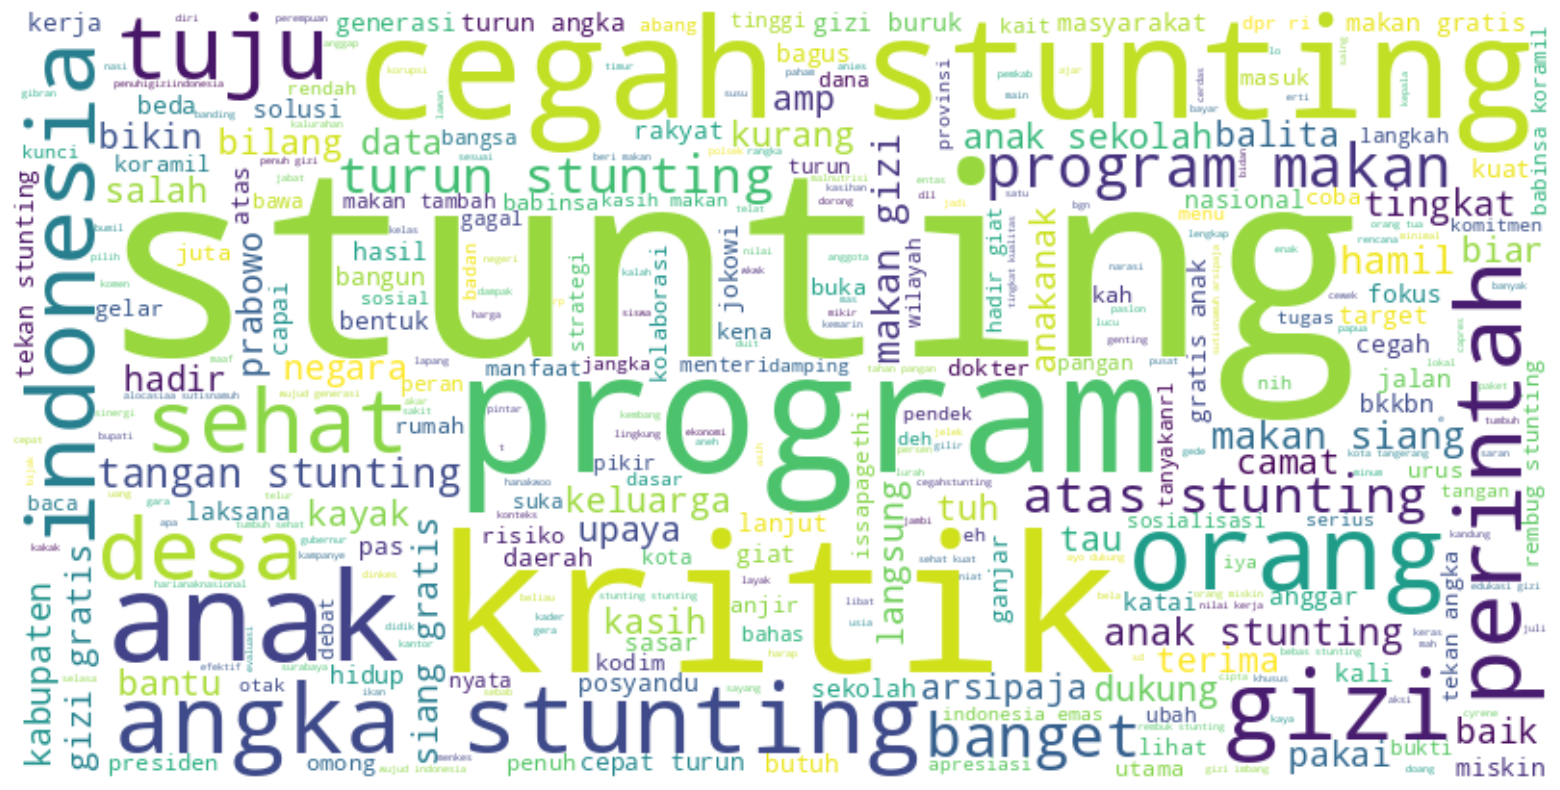

In [206]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)
stopwords.update(['mbak', 'gue', 'kak', 'sih', 'ya'])

text_after = ' '.join(df_clean['steming_data'].astype(str).tolist())
wc_after = WordCloud(stopwords=stopwords ,background_color="white", max_words=500, width=800, height=400).generate(text_after)

plt.figure(figsize=(16, 8))
plt.imshow(wc_after, interpolation='bilinear')
plt.axis("off")

plt.tight_layout()
plt.show()


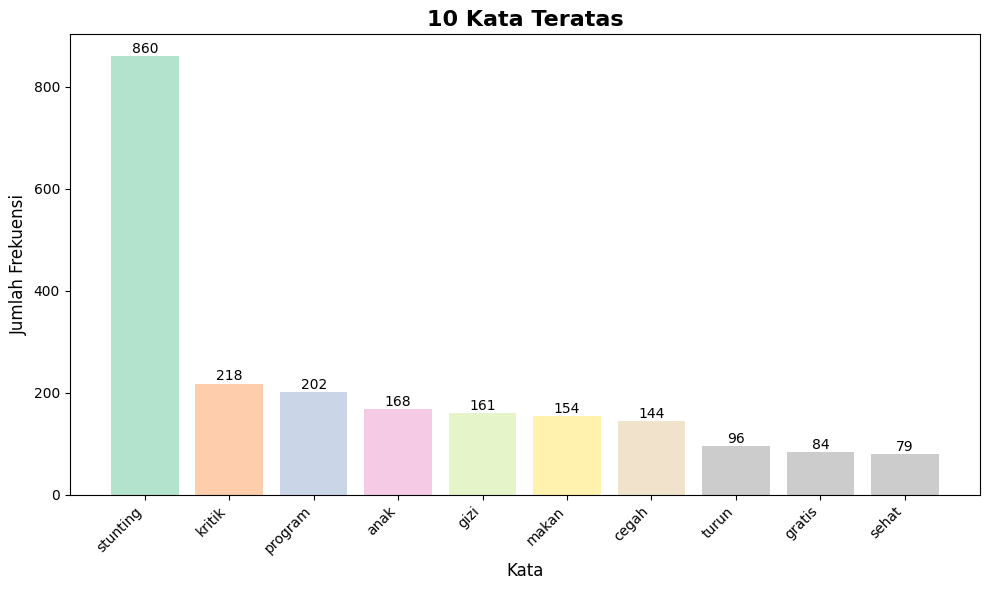

In [207]:
import matplotlib.pyplot as plt
from collections import Counter

all_text = ' '.join(df_clean["steming_data"].astype(str))
words = all_text.split()
filtered_words = [word for word in words if word.lower() not in stopwords]
word_counts = Counter(filtered_words)
top_words = word_counts.most_common(10)

if not top_words:
    print("Tidak ada kata untuk ditampilkan setelah filtering.")
else:
    word, count = zip(*top_words)
    plt.figure(figsize=(10, 6))
    colors = plt.cm.Pastel2(range(len(word)))
    bars = plt.bar(word, count, color=colors)

    plt.title("10 Kata Teratas", fontsize=16, fontweight='bold')
    plt.xlabel("Kata", fontsize=12)
    plt.ylabel("Jumlah Frekuensi", fontsize=12)
    plt.xticks(rotation=45, ha="right")

    for bar, count in zip(bars, count):
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.1, count, ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

In [208]:
df_topwords = pd.DataFrame(top_words, columns=['Word', 'Count'])
df_topwords.to_csv('topwords.csv')

# Labeling

In [209]:
import pandas as pd
import requests

# Unduh kamus leksikon positif dan negatif dari GitHub
positive_url = "https://raw.githubusercontent.com/fajri91/InSet/master/positive.tsv"
negative_url = "https://raw.githubusercontent.com/fajri91/InSet/master/negative.tsv"

positive_lexicon = set(pd.read_csv(positive_url, sep="\t", header=None)[0])
negative_lexicon = set(pd.read_csv(negative_url, sep="\t", header=None)[0])

# Fungsi untuk menentukan sentimen dan menghitung skornya
def determine_sentiment(text):
    if isinstance(text, str):
        positive_count = sum(1 for word in text.split() if word in positive_lexicon)
        negative_count = sum(1 for word in text.split() if word in negative_lexicon)
        sentiment_score = positive_count - negative_count
        if sentiment_score > 0:
            sentiment = "Positif"
        elif sentiment_score < 0:
            sentiment = "Negatif"
        else:
            sentiment = "Netral"
        return sentiment_score, sentiment
    return 0, "Netral"


# Tentukan sentimen dan skor untuk setiap ulasan
df_clean[['Score', 'Sentiment']] = df_clean['steming_data'].apply(lambda x: pd.Series(determine_sentiment(x)))

# Tampilkan hasilnya
df_clean.head(20)

,steming_data,Score,Sentiment
0,halonpc dewasa kit stunting,1,Positif
1,bayang t biayain bpjs sehat iur dokter pusing ...,-2,Negatif
2,wakil bupati luwu tegas kolaborasi cegah stunting,0,Netral
3,pemprov banten bareng bni bkkbn gaspol tekan s...,-1,Negatif
4,desa aur cina babinsa koramil pulau temiang ko...,-2,Negatif
5,lagipusingpo lihat dinonya stunting,1,Positif
6,arsipaja capai kah fungsi turun stunting ukur ...,3,Positif
7,arsipaja prog ambisius populis minim manfaat b...,0,Netral
8,svgitarlus gajah stunting anjir,0,Netral
9,arsipaja nih target standar capai data stuntin...,-4,Negatif


In [210]:
df_clean.Sentiment.value_counts()

,count
Sentiment,
Negatif,341
Positif,249
Netral,200


In [211]:
df_clean

,steming_data,Score,Sentiment
0,halonpc dewasa kit stunting,1,Positif
1,bayang t biayain bpjs sehat iur dokter pusing ...,-2,Negatif
2,wakil bupati luwu tegas kolaborasi cegah stunting,0,Netral
3,pemprov banten bareng bni bkkbn gaspol tekan s...,-1,Negatif
4,desa aur cina babinsa koramil pulau temiang ko...,-2,Negatif
...,...,...,...
785,stsweetyt hio seblakpt labilgajelas nafshx gue...,-1,Negatif
786,asyrafilkhalqi anti kritik atas nama open mind...,-4,Negatif
787,aneh banget bela lepas sifat orang leluconin b...,0,Netral
788,opini gue tuju doi qatar katai orang stunting ...,-3,Negatif


In [212]:
df_clean.loc[:, ['steming_data', 'Sentiment']]

,steming_data,Sentiment
0,halonpc dewasa kit stunting,Positif
1,bayang t biayain bpjs sehat iur dokter pusing ...,Negatif
2,wakil bupati luwu tegas kolaborasi cegah stunting,Netral
3,pemprov banten bareng bni bkkbn gaspol tekan s...,Negatif
4,desa aur cina babinsa koramil pulau temiang ko...,Negatif
...,...,...
785,stsweetyt hio seblakpt labilgajelas nafshx gue...,Negatif
786,asyrafilkhalqi anti kritik atas nama open mind...,Negatif
787,aneh banget bela lepas sifat orang leluconin b...,Netral
788,opini gue tuju doi qatar katai orang stunting ...,Negatif


In [213]:
df_final = pd.DataFrame(df_clean.loc[:, ['steming_data', 'Sentiment']])

In [214]:
df_final = df_final.rename(columns={'steming_data': 'Text'})

In [215]:
df_final.to_csv('stunting_final.csv')

# Modeling

In [217]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

X = df_final["Text"]
y = df_final['Sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [218]:
vectorizer = TfidfVectorizer()
X_vec = vectorizer.fit_transform(X)

X_dense = X_vec.toarray()

## Resampling

In [219]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_dense, y)

X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

In [220]:
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

# Evaluasi Model

In [221]:
y_pred = model.predict(X_test)
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:

              precision    recall  f1-score   support

     Negatif       0.76      0.66      0.71        68
      Netral       0.77      0.68      0.72        68
     Positif       0.65      0.81      0.72        69

    accuracy                           0.72       205
   macro avg       0.73      0.72      0.72       205
weighted avg       0.73      0.72      0.72       205


Confusion Matrix:
[[45  9 14]
 [ 6 46 16]
 [ 8  5 56]]


# Hyperparameter Tuning

In [222]:
from sklearn.model_selection import GridSearchCV

In [223]:
param_grid = {
    'alpha': [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100,1000]
}

random_search = GridSearchCV(MultinomialNB(), param_grid=param_grid, verbose=2, cv=5, n_jobs=-1)

In [224]:
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=MultinomialNB(), n_jobs=-1,
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.1, 1, 10, 100,
                                   1000]},
             verbose=2)

In [225]:
best_estimator = random_search.best_estimator_

# Evaluasi Model

In [226]:
y_pred = best_estimator.predict(X_test)
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:

              precision    recall  f1-score   support

     Negatif       0.79      0.65      0.71        68
      Netral       0.83      0.76      0.79        68
     Positif       0.69      0.86      0.76        69

    accuracy                           0.76       205
   macro avg       0.77      0.76      0.75       205
weighted avg       0.77      0.76      0.75       205


Confusion Matrix:
[[44  8 16]
 [ 5 52 11]
 [ 7  3 59]]
